## Activation Maximization on MNIST

https://github.com/raghakot/keras-vis/blob/master/examples/mnist/activation_maximization.ipynb

In [1]:
from __future__ import print_function

import numpy as np
import keras

from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Activation, Input
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 1

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax', name='preds'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.
W0728 13:57:09.635999  4440 deprecation_wrapper.py:119] From D:\development\anaconda3\envs\dlcv\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0728 13:57:09.654000  4440 deprecation_wrapper.py:119] From D:\development\anaconda3\envs\dlcv\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0728 13:57:09.659000  4440 deprecation_wrapper.py:119] From D:\development\anaconda3\envs\dlcv\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0728 13:57:09.705999  4440 deprecation_wrapper.py:119] From D:\development\anaconda3\envs\dlcv\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0728 13:57:0

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


W0728 13:57:09.817999  4440 deprecation_wrapper.py:119] From D:\development\anaconda3\envs\dlcv\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0728 13:57:09.910000  4440 deprecation.py:323] From D:\development\anaconda3\envs\dlcv\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 100s 2ms/step - loss: 0.2582 - acc: 0.9211 - val_loss: 0.0514 - val_acc: 0.9838
Test loss: 0.051444985012011606
Test accuracy: 0.9838


### Visualizing our Dense Layers



To visualize activation over final dense layer outputs, we need to **switch the softmax activation out for linear** since gradient of our output node will depend on all the other node activations. 

Doing this in keras is tricky, so they have provided **utils.apply_modifications** to modify network parameters and rebuild the graph.

If this swapping is not done, the results might be suboptimal. We will start by swapping out 'softmax' for 'linear' and compare what happens if we don't do this at the end.

Lets start by visualizing an input that maximizes the output of node 0. This should look like a 0.


In [ ]:
import sys
!{sys.executable} -m pip install git+https://github.com/raghakot/keras-vis.git -U


In [ ]:
model.summary()

In [2]:
model.layers[-1].activation

<function keras.activations.softmax(x, axis=-1)>

In [3]:
from vis.visualization import visualize_activation
from vis.utils import utils
from keras import activations
from matplotlib import pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (18, 6)

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'preds')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [4]:
filter_idx = 0
print(y_test[:, filter_idx])
indices = np.where(y_test[:, filter_idx] == 1.)
#print(indices)

[0. 0. 0. ... 0. 0. 0.]
(array([   3,   10,   13,   25,   28,   55,   69,   71,  101,  126,  136,
        148,  157,  183,  188,  192,  194,  215,  246,  269,  271,  294,
        296,  297,  305,  311,  312,  324,  327,  346,  365,  372,  380,
        407,  424,  440,  441,  443,  459,  485,  490,  498,  525,  545,
        546,  552,  561,  564,  567,  581,  586,  592,  597,  608,  611,
        620,  642,  644,  656,  661,  701,  704,  713,  717,  721,  723,
        742,  750,  763,  794,  804,  821,  845,  851,  854,  871,  884,
        895,  896,  904,  932,  972,  981,  993,  997, 1001, 1009, 1034,
       1047, 1061, 1084, 1094, 1121, 1148, 1154, 1176, 1188, 1191, 1195,
       1197, 1203, 1218, 1220, 1223, 1231, 1246, 1261, 1271, 1273, 1288,
       1294, 1297, 1333, 1379, 1390, 1399, 1404, 1408, 1411, 1416, 1438,
       1445, 1454, 1457, 1468, 1487, 1504, 1517, 1526, 1533, 1534, 1535,
       1558, 1565, 1570, 1589, 1590, 1610, 1619, 1621, 1623, 1638, 1650,
       1692, 1700, 1708, 1

In [ ]:
# This is the output node we want to maximize.
img = visualize_activation(model, layer_idx, filter_indices=filter_idx, seed_input=x_test[indices[0]])
plt.imshow(img[..., 0])

In [ ]:
len(model.layers)
layer_idx=7

In [8]:
numberOfFilters = K.int_shape(model.layers[layer_idx].output)[-1]
print(numberOfFilters)

10


In [ ]:
for filter_index in range(0, numberOfFilters):
    plt.subplot(1,numberOfFilters,filter_index+1)
    img = visualize_activation(model, layer_idx, filter_indices=filter_index,input_range=(0., 1.),seed_input=x_test[indices[0]])
    plt.imshow(img[..., 0])

# Display out plots
plt.show()


While this sort of looks like a 0, it's not as clear as we hoped for. 

The reason is because because regularization parameters needs to be tuned depending on the problem. This can be improved by:

- The input to network is preprocessed to range (0, 1). We should specify input_range = (0., 1.) to constrain the input to this range.
- The regularization parameter default weights might be dominating activation maximization loss weight. One way to debug this is to use verbose=True and examine individual loss values.
 
Lets do these step by step and see if we can improve it.


## Specifying the Input Range

### First lets explore what the individual losses look like 

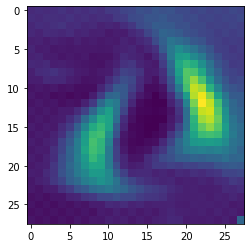

In [6]:
img = visualize_activation(model, layer_idx, filter_indices=filter_idx, input_range=(0., 1.), verbose=False)
plt.imshow(img[..., 0])

In [ ]:
for filter_index in range(0, numberOfFilters):
    plt.subplot(1,numberOfFilters,filter_index+1)
    img = visualize_activation(model, layer_idx, filter_indices=filter_index, input_range=(0., 1.))
    plt.imshow(img[..., 0])

# Display out plots
plt.show()

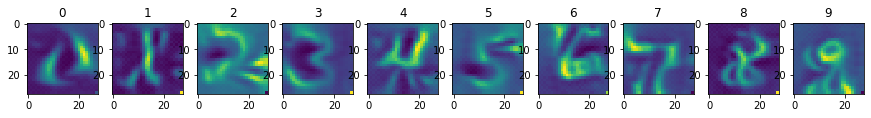

In [15]:
f, ax = plt.subplots(1, numberOfFilters)
f.set_figheight(15)  #inch
f.set_figwidth(15)
for filter_index in np.arange(numberOfFilters):
    img = visualize_activation(model, layer_idx, filter_indices=filter_index, input_range=(0., 1.))
    ax[filter_index].set_title(str(filter_index))    
    ax[filter_index].imshow(img[..., 0])
plt.show()

### Now let's do it for all classes

In [ ]:
# Generating visualizations for all classes (0-9)
for output_idx in np.arange(10):
    img = visualize_activation(model, layer_idx, filter_indices=output_idx, input_range=(0., 1.))
    plt.figure()
    plt.title('Networks perception of {}'.format(output_idx))
    plt.imshow(img[..., 0])